#### About
Tracking using Kalman filter in OpenCV.

> About the Algorithm.
1. It is used to estimate the position of a moving object across temporal dimension.
2. Gaussian curves are used to depict the positional estimate of a moving object.
3. Optimal estimate is often derived via mean and variance of Measurement estimate and State Estimate using Kalman Filter.
4. Initially, Kalman gain is found our via State estimate error and measurement error by using the formula k_g = E_st/(E_st+ E_ma) where E_ma and E_st are measurement and state estimate error of the gaussian curves.
5. Estimate at any time t is given by the following equation
> Est_t = Est_t-1 + KG(Ms - Est_t-1)
> where Est_x is estimate at time x, KG is kalman gain, Ms os measured_value
6. New state estimate error is then being calculated by following
> error_Est_t = (1-KG)(error_Est_t-1)

In [40]:
#kalman filter class
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
kf = cv2.KalmanFilter(2,10)
predict = kf.predict()
#initial prediction must be 0,0 since nothing was fed
print(predict)

[[0.]
 [0.]]


In [42]:
# kalman filter class for N 2D points

'''Kalman filtering for selected points in an image using OpenCV cv2.kalmanFilter class in Python '''
class Kalman_Filtering:

    def __init__(self):
        self.kf = cv2.KalmanFilter(4,2)

    def initialize(self):

        self.kf.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]], np.float32)
        self.kf.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)

        print('TRANSITION Matrix:')
        print(self.kf.transitionMatrix)

        print('MEASUREMENT Matrix:')
        print(self.kf.measurementMatrix)



    def predict(self,point):
        x, y = point
        ms = np.array([[np.float32(x)],[np.float32(y)]])
        self.kf.correct(ms)
        pred = self.kf.predict()
        x_pred,y_pred = pred[0],pred[1]
        return x_pred,y_pred
        

In [43]:
kf = Kalman_Filtering()
kf.initialize()

TRANSITION Matrix:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
MEASUREMENT Matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


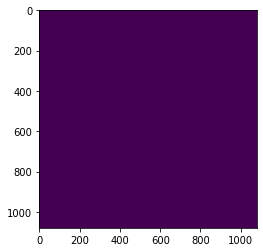

In [74]:
bg = np.ones((1080,1080))
plt.imshow(bg)

Text(0.5, 0, 'Distance')

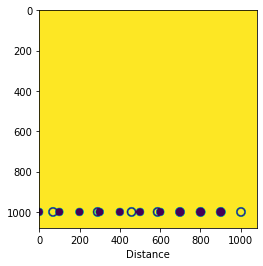

In [75]:
object_position = [(0,1000),(100,1000),(200,1000),(300,1000),(400,1000),(500,1000),(600,1000),(700,1000),(800,1000),(900,1000)]
for position in object_position:
    cv2.circle(bg, position,20,(0,10,224),-1)
    predicted = kf.predict((position[0],position[1]))
    pt = np.int0((predicted[0][0],predicted[1][0]))
    #drawing predicted
    cv2.circle(bg, pt,20,(0,10,224),6)

plt.imshow(bg)
plt.xlabel('Distance')

#### Remarks
We can see that from 700th distance, predicted equals actual and thus it predicts actual value at 1000